In [1]:
# Import all the necessary packages.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

# Upload the CSV file.
oysters = pd.read_csv('oysters.csv')  

# Print the columns.
print(oysters.info())
oysters.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                9484 non-null   object 
 1   length             9484 non-null   float64
 2   diameter           9484 non-null   float64
 3   height             9484 non-null   float64
 4   total_weight       9484 non-null   float64
 5   raw_weight         9484 non-null   float64
 6   intestines_weight  9484 non-null   float64
 7   shell_weight       9484 non-null   float64
 8   age                9484 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 667.0+ KB
None


,sex,length,diameter,height,total_weight,raw_weight,intestines_weight,shell_weight,age
0,male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,female,0.575,0.475,0.160,0.8950,0.3605,0.2210,0.2710,9
2,male,0.575,0.450,0.155,0.8860,0.3605,0.2110,0.2575,9
3,infant,0.580,0.460,0.140,0.9265,0.4135,0.1845,0.2700,10
4,infant,0.580,0.460,0.140,0.8295,0.3915,0.1650,0.2380,10


# Explore the Data.

In [2]:
# Apply the value_counts() method, and assign the results to a new DataFrame.
oysters_sex = oysters['sex'].value_counts()

# View the output.
oysters_sex

male      3561
female    3113
infant    2810
Name: sex, dtype: int64

the categories have relatively similar counts, so the data is balanced. You won’t need to take extra steps to balance the data in this instance. The next steps will be to separate the dependent variables from the independent variables, build the model, create the equation, and test the model’s accuracy.

# 3. Prepare the data  

We’ll employ an MLR to determine how accurately we can predict female oysters. Therefore, we need to extract/drop the sex column (representing the dependent variable) as the MLR will be performed on it.

In [3]:
# Set the independent variable.  
X = oysters.drop(['sex'], axis=1) 
# Set the dependent variable. 
y = oysters['sex']   

# Print to check that the sex column has been dropped.
print(list(X.columns.values))  

# Specify the train and test data sets and 
# use 30% as the 'test_size' and a random_state of one.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30, random_state = 1, stratify=y) 

['length', 'diameter', 'height', 'total_weight', 'raw_weight', 'intestines_weight', 'shell_weight', 'age']


The sex column has been dropped, and you’ve created the four data sets (X_train, X_test, y_train, and y_test). We can now start to build the model.

# 4. Build the model 

Let’s start by normalising the data. You learned about normalisation in Course 2: Data Analytics using Python (2.3.7 The process of normalising data). We’ll use the MinMaxScaler method to normalise the data. Follow the prompts:

In [5]:
# Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler  

# Create a function and set values.
scaler = MinMaxScaler(feature_range = (0, 1))  

# Add the X_train data set to the 'scaler' function.
scaler.fit(X_train)

# Specify X_train data set.
X_train = scaler.transform(X_train) 
# Specify X_test data set. 
X_test = scaler.transform(X_test)

# Define the MLR model and set predictions and parameters.
# Hint: As it is a multiclass problem, solver='newton-cg' will be necessary.
MLR = LogisticRegression(random_state=0, 
                         multi_class='multinomial', 
                         penalty='none', 
                         solver='newton-cg').fit(X_train, y_train)

# Set the predictions equal to the ‘MLR’ function and 
# specify the DataFrame.
preds = MLR.predict(X_test) 

# Set the parameters equal to the DataFrame and 
# add the ‘get_params’ function. 
params = MLR.get_params() 

# Print the parameters, intercept, and coefficients.
print(params)  
print("Intercept: \n", MLR.intercept_)
print("Coefficients: \n", MLR.coef_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Intercept: 
 [-1.84883052  1.60340815  0.24542237]
Coefficients: 
 [[ -5.81737525   5.78010804   5.43329379   5.13194904  -5.01938143
    4.32807679  -1.07708309   1.3583728 ]
 [ 10.24643821  -6.1000574   -7.87925864 -11.48779378   6.38647698
   -6.62219493   1.90516518  -3.11254823]
 [ -4.42906296   0.31994936   2.44596485   6.35584474  -1.36709555
    2.29411814  -0.8280821    1.75417543]]


The parameters are returned with three intercepts and three sets of regression coefficients. These elements allow you to construct regression equations for the model and to assess the model variables. 

# 5. Fit the logit_model

In [6]:
# Name the model and set the model to the function.
# Use the add_constant() function to determine the value of y when X=0.
logit_model = sm.MNLogit(y_train, sm.add_constant(X_train))

# Specify how the function returns the results.
result = logit_model.fit()  

# Print the report as a result.summary() function: 
print("Summary for Sex:I/M :\n ", result.summary())

Optimization terminated successfully.
         Current function value: 0.854457
         Iterations 8
Summary for Sex:I/M :
                            MNLogit Regression Results                          
Dep. Variable:                    sex   No. Observations:                 6638
Model:                        MNLogit   Df Residuals:                     6620
Method:                           MLE   Df Model:                           16
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.2189
Time:                        22:25:20   Log-Likelihood:                -5671.9
converged:                       True   LL-Null:                       -7261.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
sex=infant       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4522      0.316     10.913      0.000       2.832       4.072
x1   

The factor level female is the reference level (baseline) for the Sex variable. Therefore, female is left out of the output. Can you spot the constant that was added to both infant and male?

# 6. Create a confusion matrix

As with the BLR, we need to create a confusion matrix, which reveals key classification metrics, specifically precision, which measures how effective our model is at making positive predictions. We’ll use two methods: visualisation and print. Let’s create a confusion matrix visualisation based on the actual and predicted dependent variable values (y_test and preds):

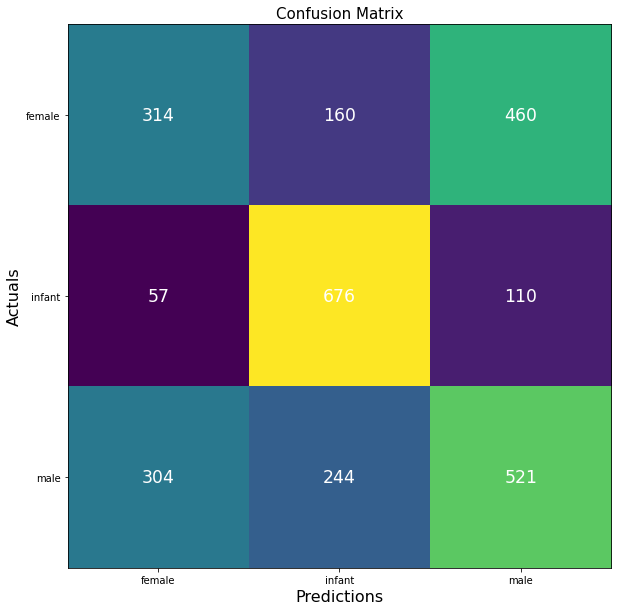

In [7]:
# Define confusion matrix.
cm = confusion_matrix(y_test, preds)  

# Create visualisation for the MLR:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2),
             ticklabels=('female', 'infant', 'male'))
ax.yaxis.set(ticks=(0, 1, 2),
             ticklabels=('female', 'infant', 'male'))

# ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j],
                ha='center',
                va='center',
                color='white',
                size='xx-large')
        
# Sets the labels.
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)

plt.show()

We can also print the confusion matrix with the following code:

Call the confusion_matrix() method, and specify y_test and preds.
Create a new variable (e.g. cmatrix), and store the NumPy array()method. Inside the brackets, specify the confusion matrix you called in Step 1.
Create a DataFrame to store the output for ease of understanding. Specify the matrix variable and the index as female, infant, and male.
Specify the column names as predicted_female, predicted_infant, and predicted_male.

In [8]:
# Create and print a confusion matrix:
# y_test as the first argument and the predictions as the second argument. 
confusion_matrix(y_test, preds)

# Transform confusion matrix into an array:
cmatrix = np.array(confusion_matrix(y_test, preds))

# Create the DataFrame from cmatrix array. 
pd.DataFrame(cmatrix, index=['female','infant', 'male'],
columns=['predicted_female', 'predicted_infant', 'predicted_male'])

,predicted_female,predicted_infant,predicted_male
female,314,160,460
infant,57,676,110
male,304,244,521


    -A total of 314 oyster were correctly predicted as female.
    -A total of 57 oyster were predicted as female, but were actual infant.
    -A total of 304 oyster were predicted as female, but were actual male.
    
    -A total of 160 oyster were predicted as infant, but were actual female.
    -A total of 676 oyster were correctly predicted as infant.
    -A total of 244 oyster were predicted as infant, but were actual male.
    
    -A total of 460 oyster were predicted as male, but were actual female.
    -A total of 110 oyster were predicted as male, but were actual infant.
    -A total of 521 oyster were correctly predicted as male.

# 7. Determine the accuracy of the model

In [9]:
# Determine accuracy statistics:
print('Accuracy score:', metrics.accuracy_score(y_test, preds))  

# Create classification report:
class_report=classification_report(y_test, preds)

print(class_report)

Accuracy score: 0.5309205903021785
              precision    recall  f1-score   support

      female       0.47      0.34      0.39       934
      infant       0.63      0.80      0.70       843
        male       0.48      0.49      0.48      1069

    accuracy                           0.53      2846
   macro avg       0.52      0.54      0.53      2846
weighted avg       0.52      0.53      0.52      2846



The output indicates the accuracy of the MLR model as 53.1% and the precision of predicting females as 47%. Sadly, our model is not very accurate and we can conclude that we have an almost 50% chance of predicting a female oyster.

# Conclusion

Remember that with a BLR, the possible outcome of the  is always 1 or yes. In this demonstration, we need it to be female for breeding purposes. Keeping this in mind, the accuracy of the model is 53%, which is not very accurate and therefore not useful as a predictive model. It seems that there is a 47% chance of success to indicate females by employing size as a variable. Therefore, as breeding programmes are very expensive and time-consuming, it might not be the best way to proceed. While inaccuracy seems to be a negative indicator, in fact, we have saved the oyster breeders a lot of wasted time and money. (Imagine they used size to indicate sex, this would be catastrophic as predictions would only be correct about half the time!) 